# Monte Carlo Simulation Assignment
This notebook contains solutions for estimating uncertainty using Monte Carlo methods.

## Part A: Estimating Area Under a Curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def function_y(x):
    ##gives the estimate for the needed function
    return 1 / (1 + np.exp(-x))  # applicable function

def monte_carlo_area(samples=10000, x_min=0, x_max=5, y_min=0, y_max=1):
   ##provide the estimated area under the curve
    x_random = np.random.uniform(x_min, x_max, samples)
    y_random = np.random.uniform(y_min, y_max, samples)
    
    under_curve = y_random <= function_y(x_random)
    
    estimated_area = (np.sum(under_curve) / samples) * (x_max - x_min) * (y_max - y_min)
    return estimated_area

# Sample sizes
sample_sizes = [10,100, 1000, 10000]
areas = [monte_carlo_area(samples) for samples in sample_sizes]

# Plot the function
for size, area in zip(sample_sizes, areas):
    print(f" the eestimated area with {size} samples: {area:.5f}")


 the eestimated area with 10 samples: 3.50000
 the eestimated area with 100 samples: 4.35000
 the eestimated area with 1000 samples: 4.32500
 the eestimated area with 10000 samples: 4.33650


## Part B: Monte Carlo Simulation of Dart Game

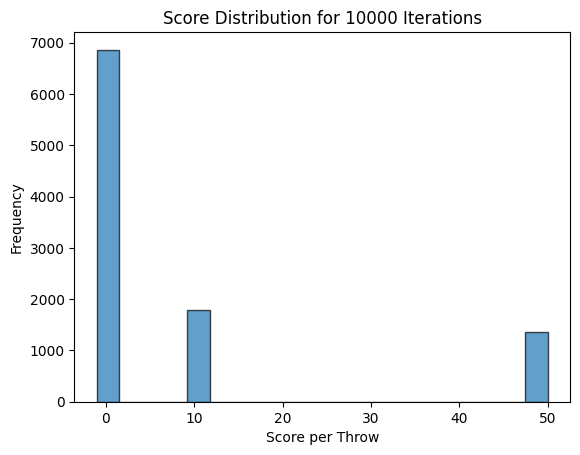

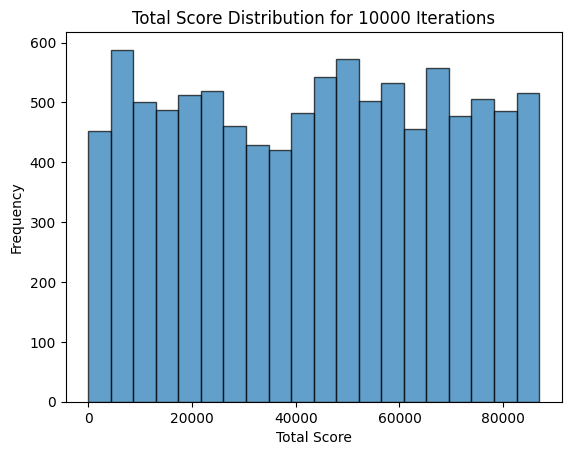

Expected Total Score: 43577.71
Variance: 633669877.16
Standard Deviation: 25172.80


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants 
dart_probabilities = [0.04, 0.32, 0.36, 0.28]  # the probabilty of hitting each region
dart_scores = [-1, 1, 10, 50]  # the answers to each region

def simulate_dart_game(trials=10000):
#attempting to simulate the game using the Monte Carlo method.
    # Step 1: Coin tossing - the 50% chance of you throwing the dart
    coin_toss = np.random.choice([0, 1], size=trials, p=[0.5, 0.5])  # 1 = You throw, 0 = Friend throws

    # Step 2: dart throwing - the probability of hitting each region
    dart_throws = np.random.choice(dart_scores, size=trials, p=dart_probabilities)
    scores = np.where(coin_toss == 1, dart_throws, 0)  # You score only if you throw

    # Step 3: makes sure the scores are non-negative
    total_scores = np.maximum(0, np.cumsum(scores))

    return scores, total_scores

# running the simulation
trials = 10000
scores, total_scores = simulate_dart_game(trials)

# plotting the histogram of scores
plt.hist(scores, bins=20, edgecolor='black', alpha=0.7)
plt.title(f"Score Distribution for {trials} Iterations")
plt.xlabel("Score per Throw")
plt.ylabel("Frequency")
plt.show()

# Plotting the histogram of total scores
plt.figure()
plt.hist(total_scores, bins=20, edgecolor='black', alpha=0.7)
plt.title(f"Total Score Distribution for {trials} Iterations")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

# Computing the expected score, variance, and standard deviation
expected_score = np.mean(total_scores)
variance = np.var(total_scores)
std_dev = np.std(total_scores)

# display results
print(f"Expected Total Score: {expected_score:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")


### Part B-1


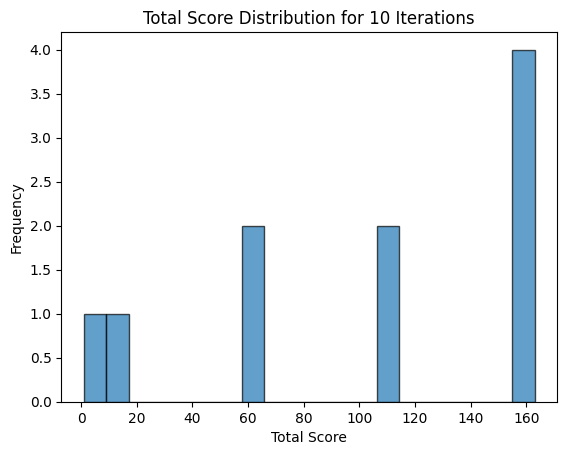

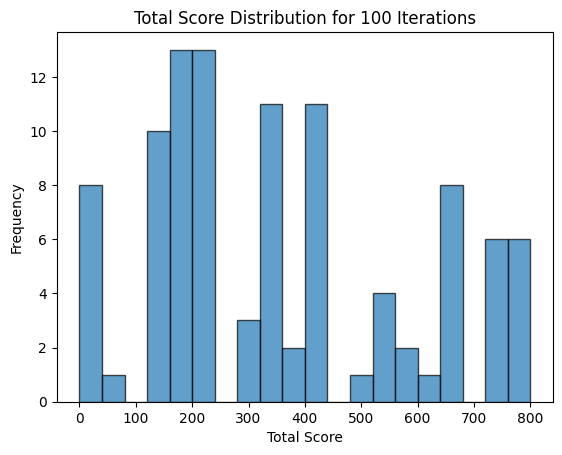

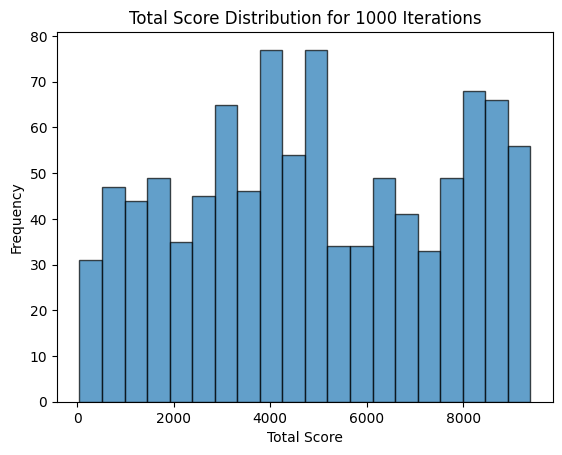

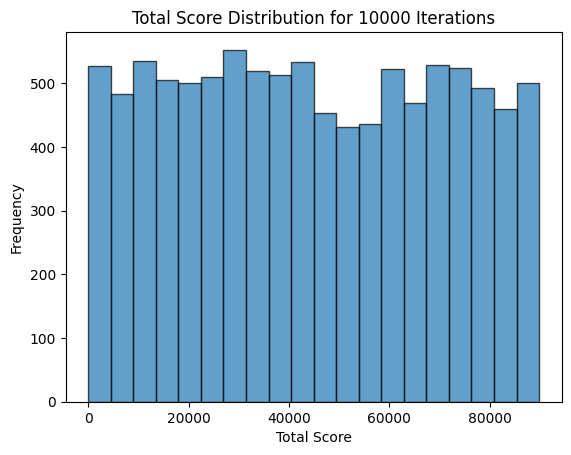

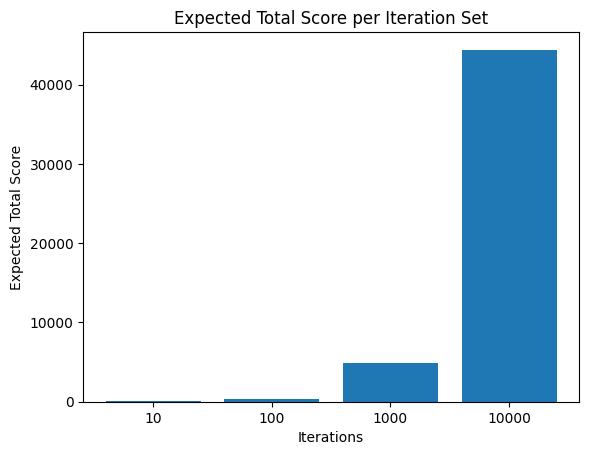

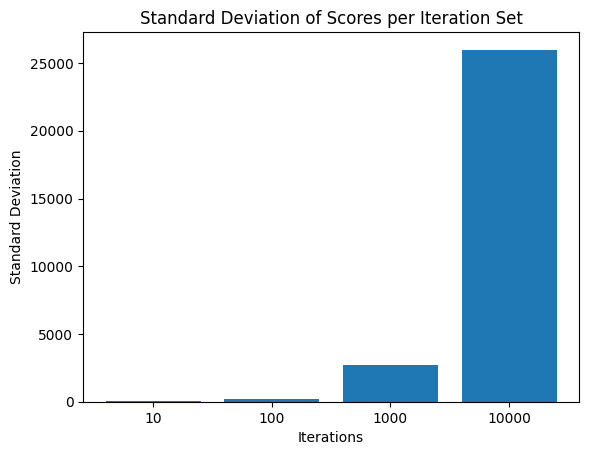

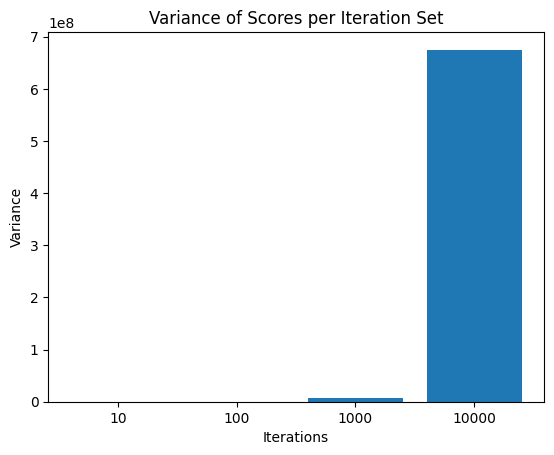

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# the function for this part
def simulate_dart_game_b1(trials=10000):
    """Simulate the dart game where each iteration is [1 Coin Toss + Potentially One or None Dart Throw]"""
    
    # Step 1: Coin toss the 50% chance of you throwing the dart
    coin_toss = np.random.choice([0, 1], size=trials, p=[0.5, 0.5])

    # Step 2: dart throw based on the probabilities
    dart_probabilities = [0.04, 0.32, 0.36, 0.28]  # Derived from given areas
    dart_scores = [-1, 1, 10, 50]  # Corresponding scores

    # Step 3: the random dart throws
    dart_throws = np.random.choice(dart_scores, size=trials, p=dart_probabilities)
    scores = np.where(coin_toss == 1, dart_throws, 0)  # You score only when you throw

    # Step 4: ensuring the total scores are non-negative
    total_scores = np.maximum(0, np.cumsum(scores))

    return total_scores

# Defines the iteration sizes
iterations = [10, 100, 1000, 10000]
simulated_scores_b1 = {iters: simulate_dart_game_b1(iters) for iters in iterations}

# plots the historgrams of the scores
for iters, total_scores in simulated_scores_b1.items():
    plt.figure()
    plt.hist(total_scores, bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Total Score Distribution for {iters} Iterations")
    plt.xlabel("Total Score")
    plt.ylabel("Frequency")
    plt.show()

# gives the total scores, variance, and standard deviation
expected_scores = [np.mean(total_scores) for total_scores in simulated_scores_b1.values()]
variances = [np.var(total_scores) for total_scores in simulated_scores_b1.values()]
std_devs = [np.std(total_scores) for total_scores in simulated_scores_b1.values()]

# plots the expected total scores
plt.figure()
plt.bar([str(i) for i in iterations], expected_scores)
plt.title("Expected Total Score per Iteration Set")
plt.xlabel("Iterations")
plt.ylabel("Expected Total Score")
plt.show()

# plots the standard deviations
plt.figure()
plt.bar([str(i) for i in iterations], std_devs)
plt.title("Standard Deviation of Scores per Iteration Set")
plt.xlabel("Iterations")
plt.ylabel("Standard Deviation")
plt.show()

# plots variances
plt.figure()
plt.bar([str(i) for i in iterations], variances)
plt.title("Variance of Scores per Iteration Set")
plt.xlabel("Iterations")
plt.ylabel("Variance")
plt.show()


### Part B-2

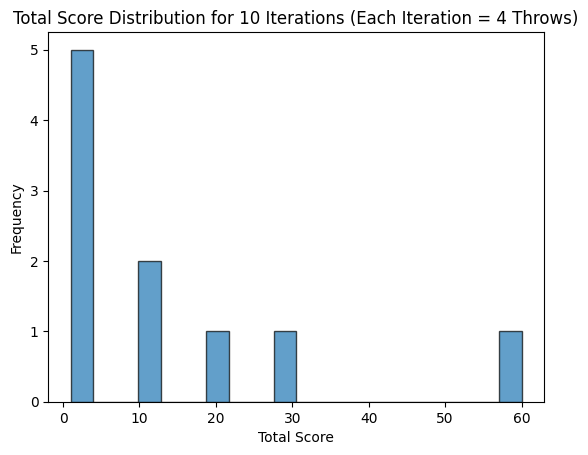

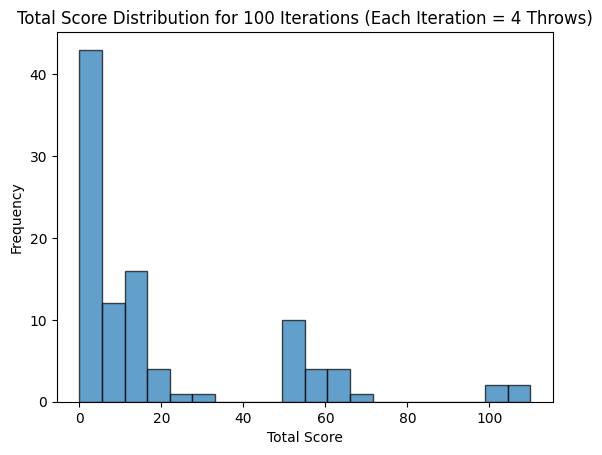

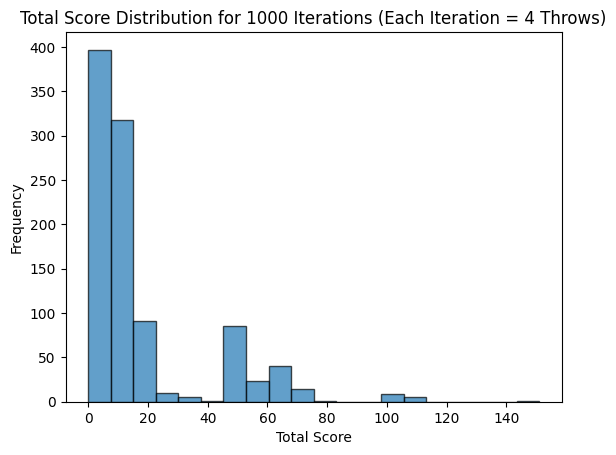

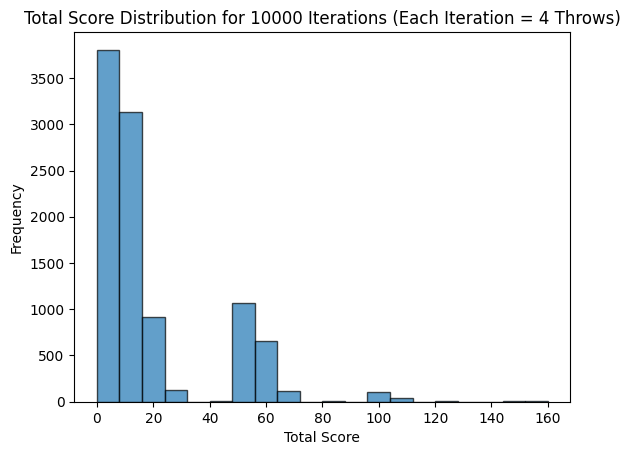

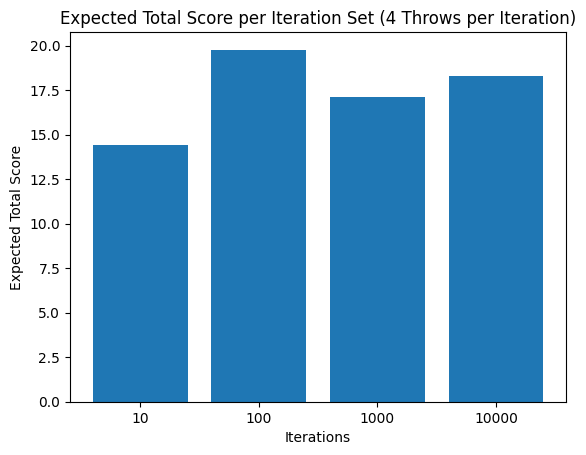

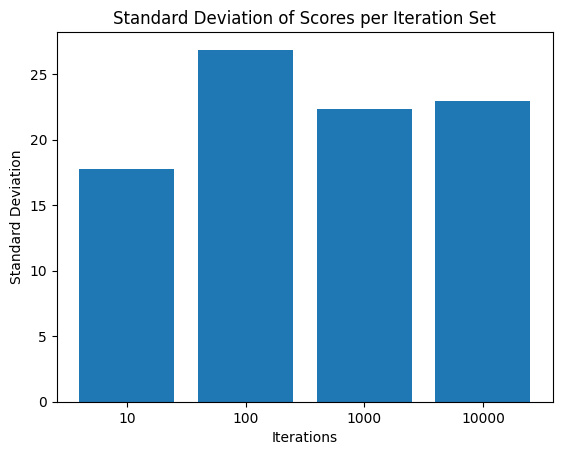

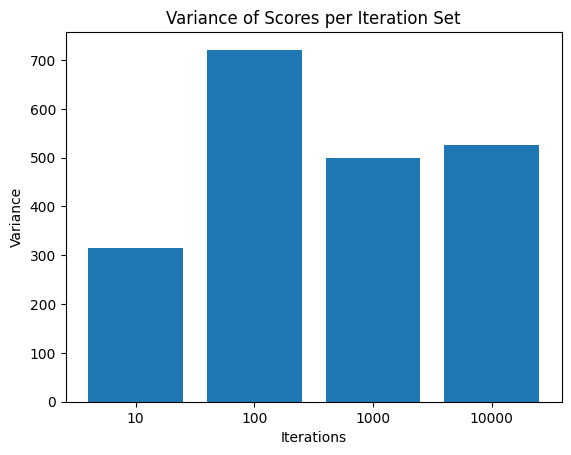

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# the probabilities and scores for this part
dart_probabilities = 10/235, 125/235, 75/235, 25/235  # Probability of landing in each ring
dart_scores = [-1, 1, 10, 50]  # Corresponding scores

def simulate_dart_game_b2(iterations=10000):
    #Simulate the dart game where each iteration is [4 Throws]
    total_scores = []
    
    for _ in range(iterations):
        round_score = 0
        
        for _ in range(4):  # all games 4 throws
            coin_toss = np.random.choice([0, 1], p=[0.5, 0.5])  # a 50% chance to throw
            dart_throw = np.random.choice(dart_scores, p=dart_probabilities) if coin_toss == 1 else 0
            round_score += dart_throw

        # Ensures the scores is a non-negative
        total_scores.append(max(0, round_score))
    
    return np.array(total_scores)

# Define the altrenate iteration sizes
iterations_list = [10, 100, 1000, 10000]
simulated_scores_b2 = {iters: simulate_dart_game_b2(iters) for iters in iterations_list}

# plot the histograms 
for iters, scores in simulated_scores_b2.items():
    plt.figure()
    plt.hist(scores, bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Total Score Distribution for {iters} Iterations (Each Iteration = 4 Throws)")
    plt.xlabel("Total Score")
    plt.ylabel("Frequency")
    plt.show()

# provide the total scores, variance, and standard deviation
expected_scores = [np.mean(scores) for scores in simulated_scores_b2.values()]
variances = [np.var(scores) for scores in simulated_scores_b2.values()]
std_devs = [np.std(scores) for scores in simulated_scores_b2.values()]

#Plot the expected total scores
plt.figure()
plt.bar([str(i) for i in iterations_list], expected_scores)
plt.title("Expected Total Score per Iteration Set (4 Throws per Iteration)")
plt.xlabel("Iterations")
plt.ylabel("Expected Total Score")
plt.show()

# Plot standard deviation
plt.figure()
plt.bar([str(i) for i in iterations_list], std_devs)
plt.title("Standard Deviation of Scores per Iteration Set")
plt.xlabel("Iterations")
plt.ylabel("Standard Deviation")
plt.show()

# Plots the variance
plt.figure()
plt.bar([str(i) for i in iterations_list], variances)
plt.title("Variance of Scores per Iteration Set")
plt.xlabel("Iterations")
plt.ylabel("Variance")
plt.show()


In [5]:
### Geometric probabilty

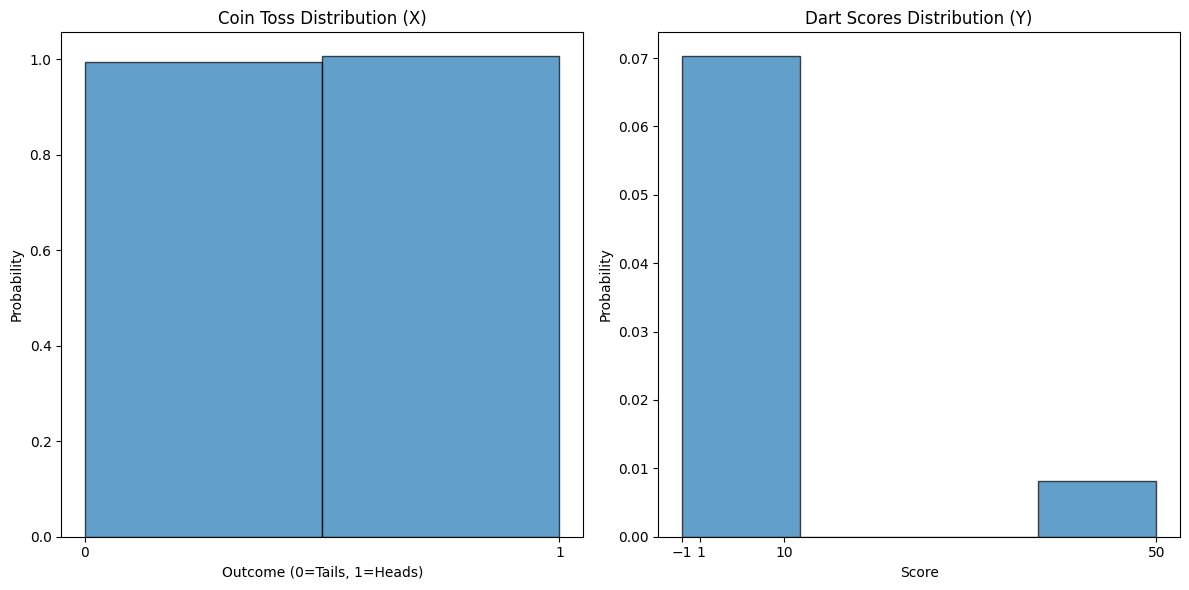

Expected long-term score: 18.27


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define random variable X (coin toss) and Y (dart scores)
# X is Bernoulli with p = 0.5
# Y is custom with probabilities based on given proportions
def simulate_game(iterations=10000):
    # Probability distributions
    coin_toss_probs = [0.5, 0.5]  # P(H) = 0.5, P(T) = 0.5
    dart_score_probs = [10/235, 125/235, 75/235, 25/235]  # Relative probabilities based on area
    
    # Score options for Y
    dart_scores = [-1, 1, 10, 50]
    
    # Create samples
    coin_toss_samples = np.random.choice([0, 1], size=iterations, p=coin_toss_probs)
    dart_score_samples = np.random.choice(dart_scores, size=iterations, p=dart_score_probs)
    
    # Plot histograms of spplicable distributions
    plt.figure(figsize=(12, 6))
    
    # Coin toss histogram
    plt.subplot(1, 2, 1)
    plt.hist(coin_toss_samples, bins=2, edgecolor='black', alpha=0.7, density=True)
    plt.title("Coin Toss Distribution (X)")
    plt.xlabel("Outcome (0=Tails, 1=Heads)")
    plt.ylabel("Probability")
    plt.xticks([0, 1])
    
    # Dart score histogram
    plt.subplot(1, 2, 2)
    plt.hist(dart_score_samples, bins=len(dart_scores), edgecolor='black', alpha=0.7, density=True)
    plt.title("Dart Scores Distribution (Y)")
    plt.xlabel("Score")
    plt.ylabel("Probability")
    plt.xticks(dart_scores)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate expected score
    total_scores = []
    for _ in range(iterations):
        # Simulate a single round
        total_score = 0
        for _ in range(4):  # Four dart throws
            if np.random.rand() <= 0.5:  # Coin toss to decide if dart is thrown
                total_score += np.random.choice(dart_scores, p=dart_score_probs)
        total_scores.append(max(0, total_score))  # Ensure score is non-negative
    
    expected_score = np.mean(total_scores)
    print(f"Expected long-term score: {expected_score:.2f}")

# Run the simulation and plot results
simulate_game(10000)
